# Random Forest Model

In [2]:
import pandas as pd

df = pd.read_csv("kidney_Disease_Pre_processed.csv")
df.head(20)

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,48,80,1.020,1,0,0,0,1,1,...,44,7800,5.2,0,0,1,1,1,1,0
1,1,7,50,1.020,4,0,0,0,1,1,...,38,6000,0.0,1,1,1,1,1,1,0
2,2,62,80,1.010,2,3,0,0,1,1,...,31,7500,0.0,1,0,1,0,1,0,0
3,3,48,70,1.005,4,0,0,1,0,1,...,32,6700,3.9,0,1,1,0,0,0,0
4,4,51,80,1.010,2,0,0,0,1,1,...,35,7300,4.6,1,1,1,1,1,1,0
5,5,60,90,1.015,3,0,0,0,1,1,...,39,7800,4.4,0,0,1,1,0,1,0
6,6,68,70,1.010,0,0,0,0,1,1,...,36,0,0.0,1,1,1,1,1,1,0
7,7,24,80,1.015,2,4,0,1,1,1,...,44,6900,5.0,1,0,1,1,0,1,0
8,8,52,100,1.015,3,0,0,1,0,1,...,33,9600,4.0,0,0,1,1,1,0,0
9,9,53,90,1.020,2,0,1,1,0,1,...,29,12100,3.7,0,0,1,0,1,0,0


### Train and Predict

In [3]:
x = df.drop('class',axis='columns')
y = df['class']
x

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,0,48,80,1.020,1,0,0,0,1,1,...,15.4,44,7800,5.2,0,0,1,1,1,1
1,1,7,50,1.020,4,0,0,0,1,1,...,11.3,38,6000,0.0,1,1,1,1,1,1
2,2,62,80,1.010,2,3,0,0,1,1,...,9.6,31,7500,0.0,1,0,1,0,1,0
3,3,48,70,1.005,4,0,0,1,0,1,...,11.2,32,6700,3.9,0,1,1,0,0,0
4,4,51,80,1.010,2,0,0,0,1,1,...,11.6,35,7300,4.6,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1.020,0,0,0,0,1,1,...,15.7,47,6700,4.9,1,1,1,1,1,1
396,396,42,70,1.025,0,0,0,0,1,1,...,16.5,54,7800,6.2,1,1,1,1,1,1
397,397,12,80,1.020,0,0,0,0,1,1,...,15.8,49,6600,5.4,1,1,1,1,1,1
398,398,17,60,1.025,0,0,0,0,1,1,...,14.2,51,7200,5.9,1,1,1,1,1,1


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [8]:
model.score(x_test,y_test)

1.0

In [9]:
y_predicted = model.predict(x_test)

# Random Forest Grid Search

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(n_estimators=10)


model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(n_estimators=10)

parameters = {
    #'n_estimators':[10,50,250,1000]
    'n_estimators' : [5,20,50,100], # number of trees in the random forest
    'max_features' : ['auto', 'sqrt'], # number of features in consideration at every split
    #'max_depth' : [int(x) for x in np.linspace(10, 120, num = 12)], # maximum number of levels allowed in each decision tree
    'min_samples_split' : [2, 6, 10], # minimum sample number to split a node
    'min_samples_leaf' : [1, 3, 4], # minimum sample number that can be stored in a leaf node
    'bootstrap' : [True, False], # method used to sample data points
}

grid_search = GridSearchCV(model, parameters,scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train,y_train)


GridSearchCV(estimator=RandomForestClassifier(n_estimators=10), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 20, 50, 100]},
             scoring='accuracy')

In [12]:
print("Best params:",grid_search.best_params_)

print("Best score:",grid_search.best_score_)

print("Best score for train:",grid_search.score(x_train, y_train))

print("Best test:",grid_search.score(x_test, y_test))


Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
Best score: 1.0
Best score for train: 1.0
Best test: 1.0


### Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[50,  0],
       [ 0, 30]])

Text(95.72222222222221, 0.5, 'Truth')

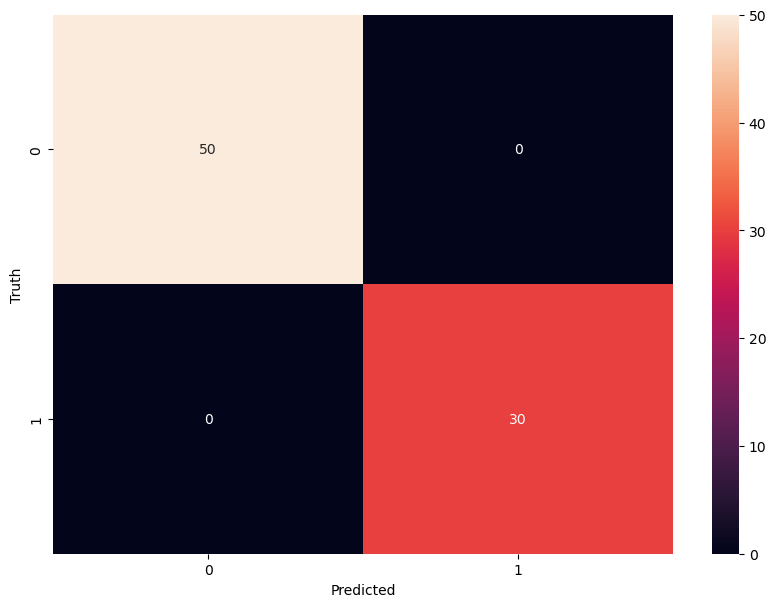

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')